In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('data.csv')
df = df.dropna()

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, columns=['weekday', 'platform'])
# Drop the 'created' and 'ended' columns in-place
df.drop(['created', 'ended'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())
print(df.info())


     sessionId  kwhTotal  dollars  startTime  endTime  chargeTimeHrs  \
343    7093670      5.61      0.0         15       18       3.413056   
344    3730551      9.03      0.0         19       22       3.140278   
345    7080329      6.95      0.0         19       21       2.455278   
346    3829635      7.38      0.0         19       21       2.483056   
347    6139758      6.69      0.0         17       19       2.245833   

      distance    userId  stationId  locationId  ...  reportedZip  \
343  20.695727  30828105     632920      461655  ...            1   
344  20.695727  30828105     569889      461655  ...            1   
345  20.695727  30828105     612116      461655  ...            1   
346  20.695727  30828105     549414      461655  ...            1   
347  20.695727  30828105     129465      461655  ...            1   

     weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
343            0            0            0            0            0   
344     

**XGB**

Mean Squared Error: 1.3455415808396596
R-squared: 0.6730011257632911
Accuracy: 44.64%
XGBoost Hyperparameters:
Number of Estimators: 50
Learning Rate: 0.1
Maximum Depth: 5
Subsample: 0.9
Colsample bytree: 0.8


<Figure size 1200x800 with 0 Axes>

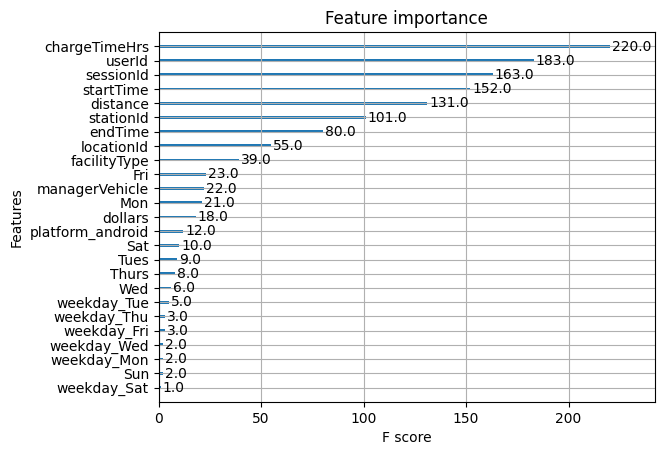

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create and train the XGBoost model with the best parameters
model = XGBRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree']
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test.round(), y_pred.round())
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display best hyperparameters
print("XGBoost Hyperparameters:")
print(f"Number of Estimators: {best_params['n_estimators']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Maximum Depth: {best_params['max_depth']}")
print(f"Subsample: {best_params['subsample']}")
print(f"Colsample bytree: {best_params['colsample_bytree']}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(model, importance_type='weight')
plt.show()



ADA

Mean Squared Error: 2.1674705342265725
R-squared: 0.4732526777871563
Accuracy: 24.03%


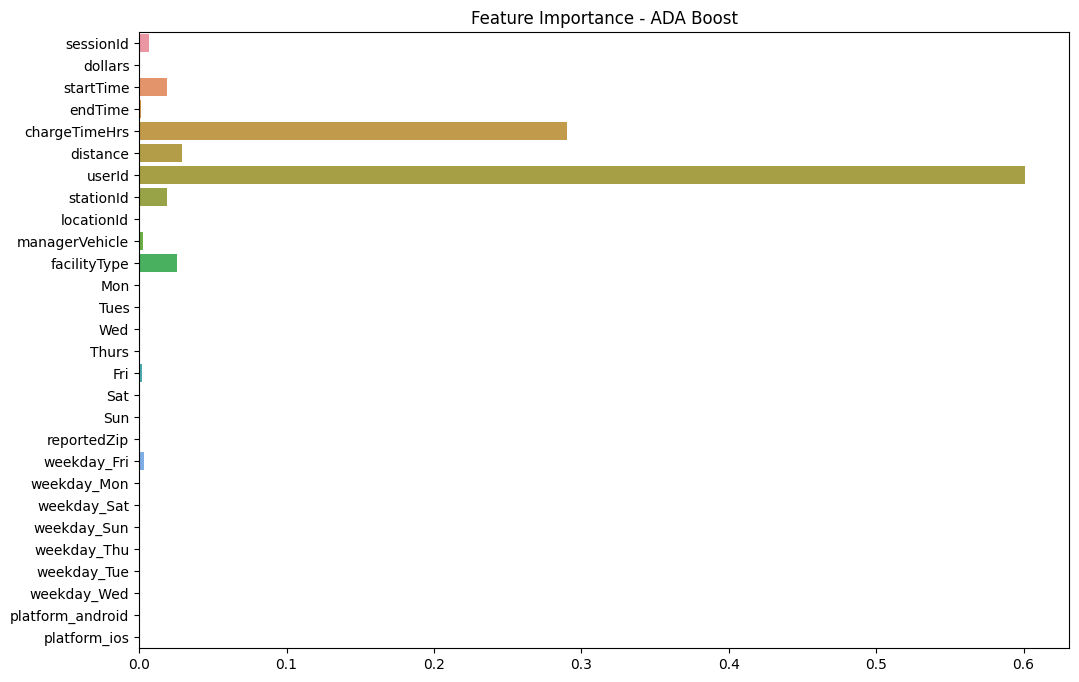

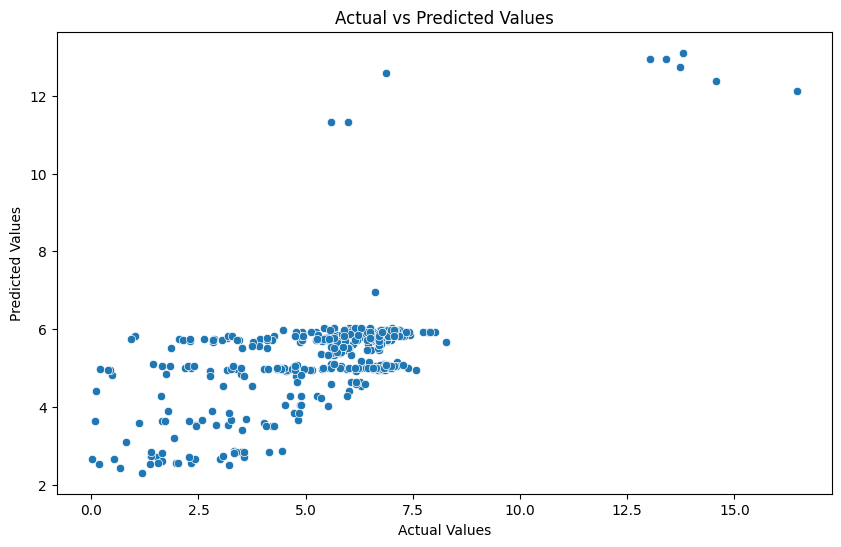

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_classification


X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost model
base_model = DecisionTreeRegressor(max_depth=3)
model = AdaBoostRegressor(base_model, n_estimators=50, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test.round(), y_pred.round())
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance - ADA Boost')
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Gradient Boost

Mean Squared Error: 1.5696655300939433
R-squared: 0.6185336309349991
Accuracy: 37.34%


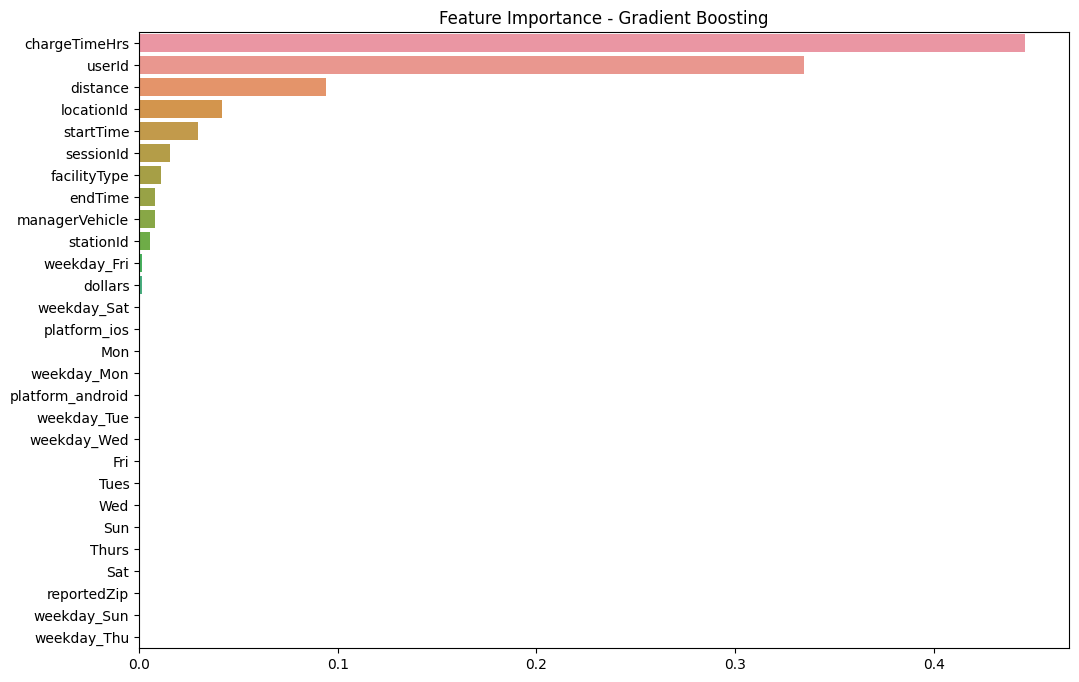

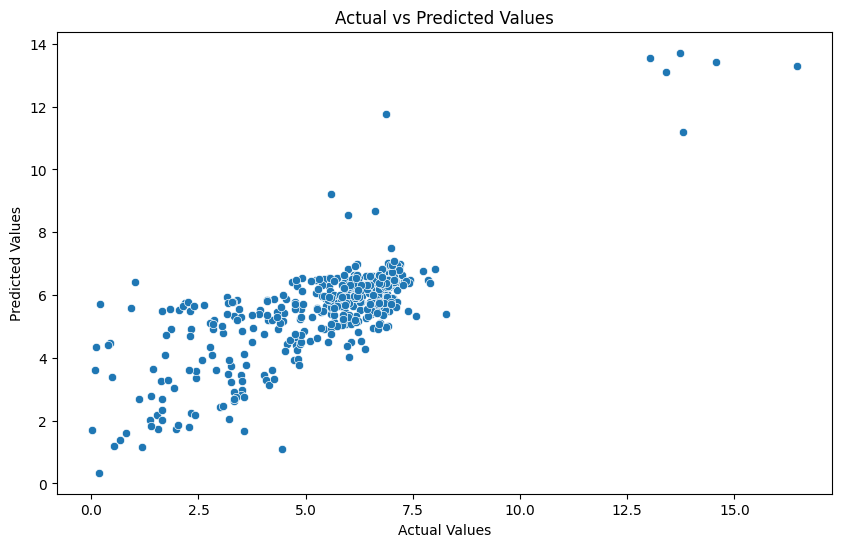

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor

X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test.round(), y_pred.round())
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importance.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance[indices], y=feature_names[indices])
plt.title('Feature Importance - Gradient Boosting')
plt.show()

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Neural Networks

Mean Squared Error: 6159965.055536111
R-squared: -1497018.2427949996
Neural Network Hyperparameters:
Hidden Layer Sizes: (100, 50)
Activation Function: relu
Initial Learning Rate: 0.001
L2 Regularization Term (Alpha): 0.01


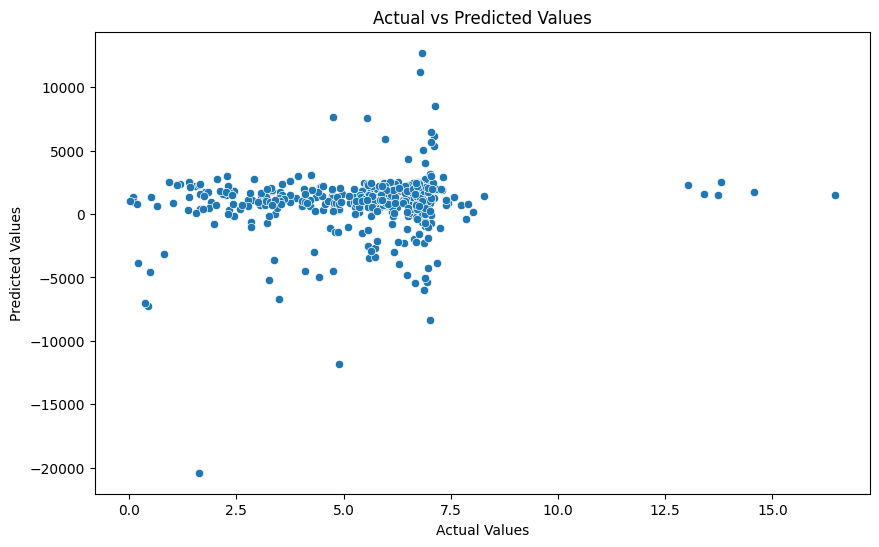

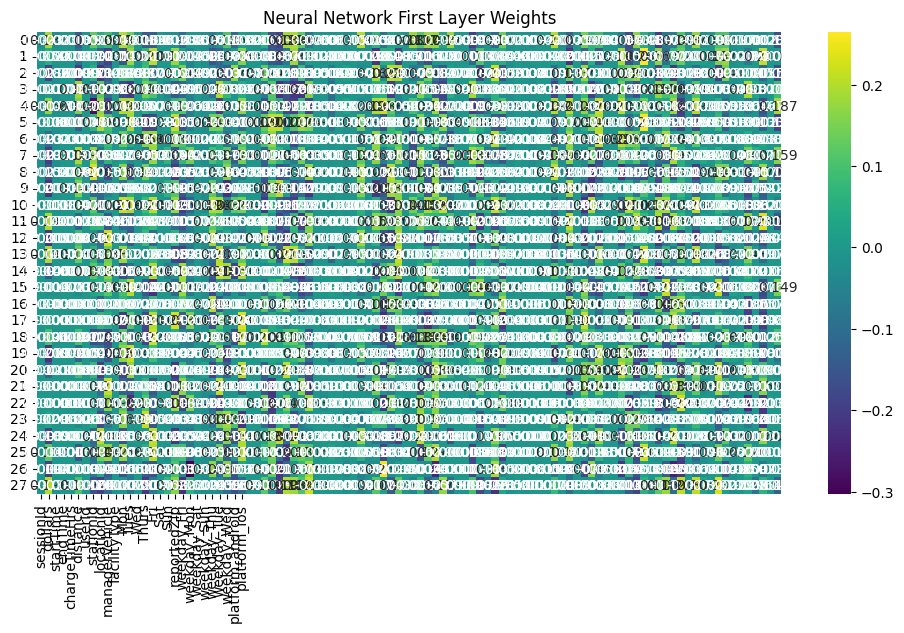

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the neural network model
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', learning_rate_init=0.001, alpha=0.01, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display hyperparameters
print("Neural Network Hyperparameters:")
print(f"Hidden Layer Sizes: {model.hidden_layer_sizes}")
print(f"Activation Function: {model.activation}")
print(f"Initial Learning Rate: {model.learning_rate_init}")
print(f"L2 Regularization Term (Alpha): {model.alpha}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Get the weights of the first layer
weights_first_layer = model.coefs_[0]

# Visualize the weights
plt.figure(figsize=(12, 6))
sns.heatmap(weights_first_layer, cmap='viridis', annot=True, fmt='.3f', xticklabels=X.columns)
plt.title('Neural Network First Layer Weights')
plt.show()


Linear Regression

Mean Squared Error (MSE): 3.0085285336910723
R-squared (R2): 0.2688554128426974


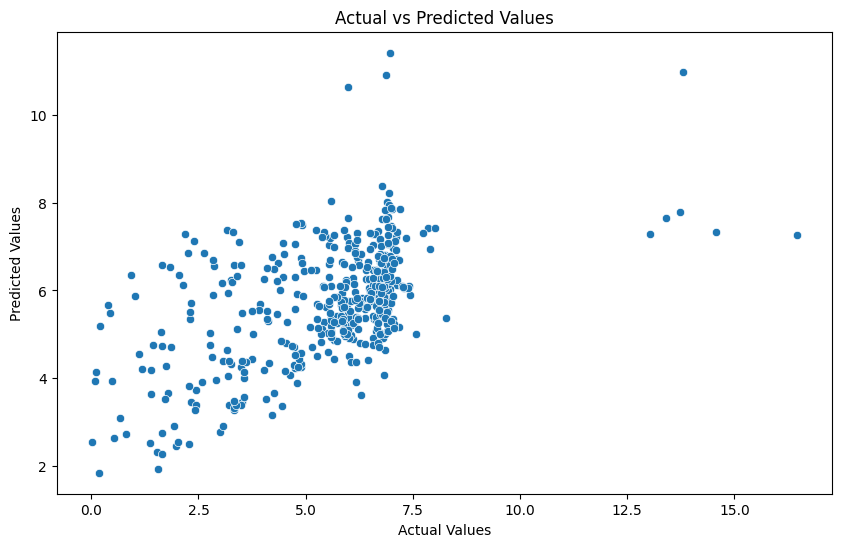

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display accuracy metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Random Forest

Mean Squared Error: 1.4636601238841205
R-squared: 0.6442954869691961
Random Forest Hyperparameters:
Number of Trees (n_estimators): 100
Maximum Depth of Trees (max_depth): None
Minimum Samples Split (min_samples_split): 2
Minimum Samples Leaf (min_samples_leaf): 1


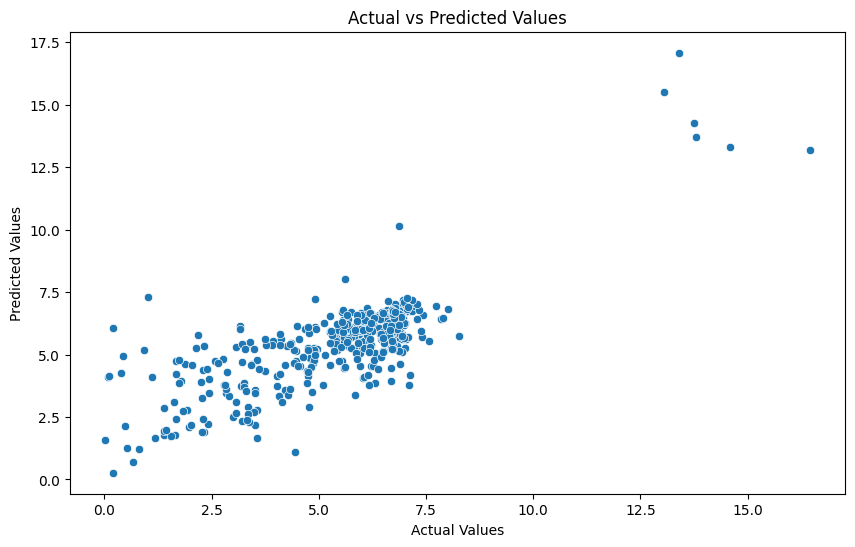

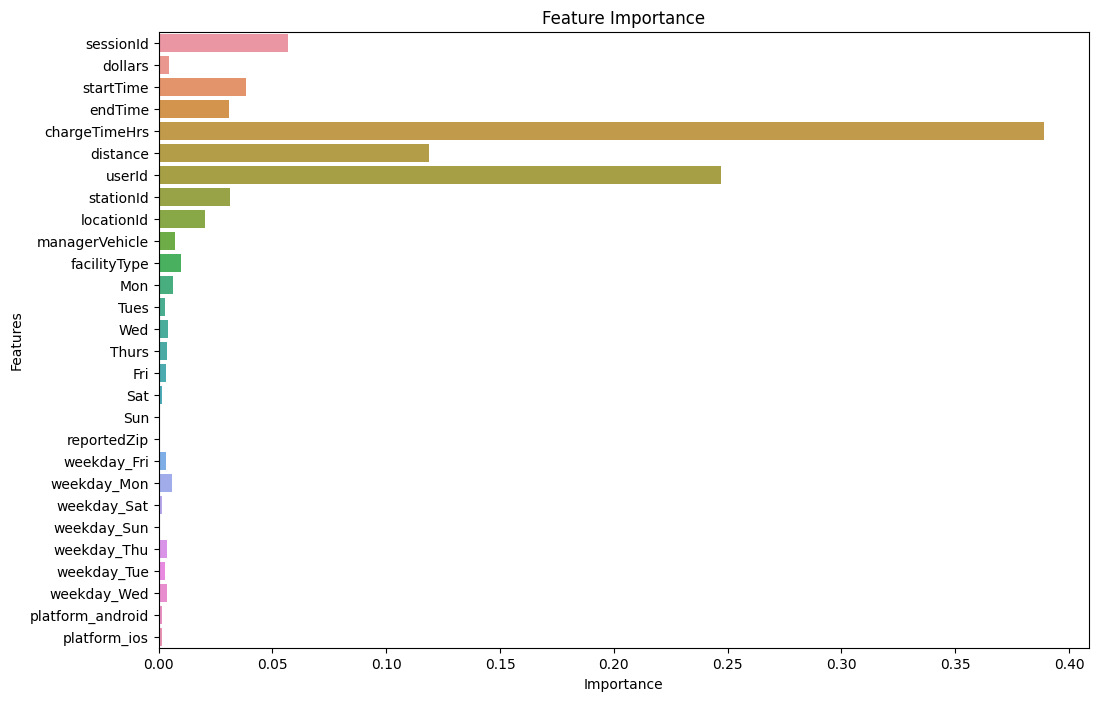

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


X = df.drop(['kwhTotal'], axis=1)
y = df['kwhTotal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display hyperparameters
print("Random Forest Hyperparameters:")
print(f"Number of Trees (n_estimators): {model.n_estimators}")
print(f"Maximum Depth of Trees (max_depth): {model.max_depth}")
print(f"Minimum Samples Split (min_samples_split): {model.min_samples_split}")
print(f"Minimum Samples Leaf (min_samples_leaf): {model.min_samples_leaf}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Plot feature importance
feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
